## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Содержание проекта:
* 1 [Загрузка и подготовка данных](#m1)
    * 1.1 [Чтение таблиц](#m1.1)
    * 1.2 [Обработка пропусков](#m1.2)
    * 1.3 [Обработка дубликатов](#m1.3)
    * 1.4 [Лемматизация](#m1.4)
    * 1.5 [Категоризация данных](#m1.5)
* 2 [Ответы на вопросы](#m2)
    * 2.1 [Зависимость между наличием детей и возвратом кредита в срок](#m2.1)
    * 2.2 [Зависимость семейного положения и возврата кредита в срок](#m2.2)
    * 2.3 [Зависимость между уровнем дохода и возвратом кредита в срок](#m2.3)
    * 2.4 [Влияние цели кредита на возврат кредита в срок](#m2.4)
* 3 [Обищй вывод](#m3)

## Загрузка и подготовка данных <a name="m1"></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from pymystem3 import Mystem 
from collections import Counter
m = Mystem() 

### Чтение таблицы <a name="m1.1"></a>

In [52]:
score_credit = pd.read_csv('df1.csv')

In [53]:
score_credit

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Описание данных:**
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

In [54]:
score_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Таблица содержит некорректные значения в столбцах days_employed, а также повторения одной и той же цели разными словами в purpose. В столбце education замечено написание с заглавной буквы на фоне слов нижнего регистра. Нужно изучить каждый столбце на пустые значения, повторения, нули и понять важен столбец или нет, возможно его можно просто удалить без потери качества анализа данных.

### Обработка пропусков <a name="m1.2"></a>

In [55]:
score_credit.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [56]:
score_credit['dob_years'].value_counts() 

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [57]:
score_credit['children'].value_counts() 

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Пропуски замечены в столбце days_employed (рабочий стаж в днях) и total_income (ежемесячная зарплата). В столбце dob_years найден возраст "0". В столбце children найдено показатели детей в количестве -1 и в количестве 20.
Природа ошибок в children как по мне существует несколько: 
1. 20 может быть как опечатка числа 2 или как опечатка числа 0
2. 20 может быть обозначением многодетных семей, если учитывать усыновленных, однако 20 встречается также и у людей, кому всего-то 24 года.
3. -1 может быть как отрицательным ответом на наличие детей
4. -1 может быть ошибкой при заполнении таблицы и должно означать 1 ребенок.

Природа ошибок в dob_years может быть связана с ошибкой заполнения данных в столбце.

Так как столбец о днях стажа, id семейного статуса и id образования никак не влияют на изучение данных в таблице, мной принято решение удалить столбцы. 

In [58]:
del score_credit['days_employed']
del score_credit['education_id']
del score_credit['family_status_id']

In [59]:
score_credit.head()

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,женат / замужем,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616.077870,сыграть свадьбу


In [60]:
years_mean = score_credit['dob_years'].mean() 
years_mean

43.29337979094077

Ставить средний возраст в пропуски мне показалось неправильным, ведь пропуски могут быть и у пенсионеров, а средний возраст 43 не относится к пенсионному. Поэтому все строки со значением 0 удаляем. Также удаляем строки, где 20 днетей или -1 ребенок.

In [61]:
before = len(score_credit)
# количество строк до удаления

In [62]:
score_credit = score_credit[score_credit['dob_years'] != 0].reset_index(drop=True)
score_credit = score_credit[score_credit['children'] != 20].reset_index(drop=True)
score_credit = score_credit[score_credit['children'] != -1].reset_index(drop=True)
after = len(score_credit)
# количество строк после удаления
score_credit

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,женат / замужем,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...
21297,1,43,среднее,гражданский брак,F,компаньон,0,224791.862382,операции с жильем
21298,0,67,среднее,женат / замужем,F,пенсионер,0,155999.806512,сделка с автомобилем
21299,1,38,среднее,гражданский брак,M,сотрудник,1,89672.561153,недвижимость
21300,3,38,среднее,женат / замужем,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [63]:
print('Процент оставшихся строк: {:.2%}'\
            .format(after / before))

Процент оставшихся строк: 98.96%


In [64]:
score_credit['total_income'] = score_credit['total_income'] \
                               .fillna(score_credit.groupby('income_type')['total_income'].transform('median'))
# группировка по виду занятости и нахождение медианного значения, замена пропусков на медианное значение относительно виду занятости
score_credit['total_income'] = score_credit['total_income'].astype('int')
# переводим столбец в тип int, так как после изменения он принл тип float
score_credit['total_income'].value_counts()

142594    1096
172491     502
118497     408
150475     148
138071       3
          ... 
74734        1
131711       1
144364       1
101355       1
264193       1
Name: total_income, Length: 18423, dtype: int64

В столбце total_income для заполнение пустых ячеек используется медианное значение заработной платы относительно вида занятости. Для перевода в int из float был использован метод astype(), благодаря которому можно передать нужный тип данных для замены.

### Обработка дубликатов <a name="m1.3"></a>

Перед удалением дубликатов приведем написание данных некоторых столбцов в нужную форму.

In [65]:
score_credit['education'].value_counts()

среднее                13609
высшее                  4666
СРЕДНЕЕ                  764
Среднее                  700
неоконченное высшее      663
ВЫСШЕЕ                   270
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Названия имеют дубликаты из-за специфики написания. высшее, ВЫСШЕЕ, Высшее, как пример. Изменим эту ситуацию, сделав у каждого написания одинаковый регистр.

In [66]:
score_credit['education'] = score_credit['education'].str.lower()
score_credit['education'].value_counts()

среднее                15073
высшее                  5202
неоконченное высшее      739
начальное                282
ученая степень             6
Name: education, dtype: int64

In [67]:
score_credit['family_status'].value_counts()

женат / замужем          12254
гражданский брак          4139
Не женат / не замужем     2783
в разводе                 1179
вдовец / вдова             947
Name: family_status, dtype: int64

В таблице нет повторений семейного положения, но сделаем ее чуть презентабельнее.

In [68]:
score_credit['family_status'] = score_credit['family_status'].str.lower()
score_credit['family_status'].value_counts()

женат / замужем          12254
гражданский брак          4139
не женат / не замужем     2783
в разводе                 1179
вдовец / вдова             947
Name: family_status, dtype: int64

In [69]:
score_credit.duplicated().sum()

71

In [70]:
duplicates_score_credit = score_credit[score_credit.duplicated(keep='first')]
duplicates_score_credit.sort_values(by='total_income', ascending=False)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
15819,0,51,среднее,гражданский брак,F,компаньон,0,172491,на проведение свадьбы
13728,1,31,среднее,женат / замужем,F,компаньон,0,172491,покупка жилья
17584,1,40,среднее,гражданский брак,F,компаньон,0,172491,строительство жилой недвижимости
19165,0,45,среднее,гражданский брак,F,компаньон,0,172491,свадьба
19182,0,38,высшее,гражданский брак,F,компаньон,0,172491,на проведение свадьбы
...,...,...,...,...,...,...,...,...,...
13491,0,64,среднее,женат / замужем,F,пенсионер,0,118497,автомобиль
16030,0,56,среднее,женат / замужем,F,пенсионер,0,118497,на покупку автомобиля
3260,0,58,среднее,гражданский брак,F,пенсионер,0,118497,сыграть свадьбу
15112,0,57,среднее,гражданский брак,F,пенсионер,0,118497,свадьба


Таблица содержит 71 дубликат. Можно найти связь между заменой total_income на медианное значение и созданием дубликатов на этом фоне.

In [71]:
score_credit.drop_duplicates().reset_index(drop=True)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,среднее,женат / замужем,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...
21226,1,43,среднее,гражданский брак,F,компаньон,0,224791,операции с жильем
21227,0,67,среднее,женат / замужем,F,пенсионер,0,155999,сделка с автомобилем
21228,1,38,среднее,гражданский брак,M,сотрудник,1,89672,недвижимость
21229,3,38,среднее,женат / замужем,M,сотрудник,1,244093,на покупку своего автомобиля


Принято было удалить дубликаты с помощью метода drop_duplicates с изменением индексов и удалением старых значений. 71 строчки не должны помешать для следующей обработки данных.

### Лемматизация <a name="m1.4"></a>

In [72]:
score_credit['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           764
операции с недвижимостью                  670
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   649
операции с коммерческой недвижимостью     644
операции с жильем                         642
покупка жилья для семьи                   639
жилье                                     636
покупка жилья                             635
недвижимость                              628
операции со своей недвижимостью           626
строительство собственной недвижимости    626
строительство недвижимости                620
строительство жилой недвижимости          619
покупка своего жилья                      618
покупка недвижимости                      616
ремонт жилью                              607
покупка жилой недвижимости                600
на покупку своего автомобиля              501
заняться высшим образованием      

При рассмотрении выделили основные цели: свадьба, недвижимость, автомобиль, образование, проведет лемматизацию

In [73]:
score_credit['lemma'] = score_credit.purpose.apply(m.lemmatize)
Counter(m.lemmatize(' '.join(score_credit['purpose'])))
def purpose_short(lst):
    if 'автомобиль' in lst:
        return 'автомобиль'
    if 'образование' in lst:
        return 'образование'
    if 'свадьба' in lst:
        return 'свадьба'
    if 'ремонт' in lst:
        return 'ремонт'
    if 'жилье' in lst or 'недвижимость' in lst:
        return 'недвижимость'
score_credit['lemma'] = score_credit.lemma.apply(purpose_short)
score_credit.head(10)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,lemma
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,33,среднее,женат / замужем,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628,дополнительное образование,образование
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,27,высшее,гражданский брак,M,компаньон,0,255763,покупка жилья,недвижимость
6,0,43,высшее,женат / замужем,F,компаньон,0,240525,операции с жильем,недвижимость
7,0,50,среднее,женат / замужем,M,сотрудник,0,135823,образование,образование
8,2,35,высшее,гражданский брак,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,41,среднее,женат / замужем,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость


### Категоризация данных <a name="m1.5"></a>

In [74]:
score_credit.groupby('total_income')['debt'].agg(['count','mean'])

,count,mean
total_income,,
20667,1,1.0
21205,1,0.0
21367,1,0.0
21695,1,0.0
21895,1,0.0
...,...,...
1711309,1,0.0
1715018,1,0.0
1726276,1,0.0


Для последующей работы с даннами нам нужно будет создавать сводную таблицу между total_income и debt. При пробном составлении сводной таблицы через группировку groupby можно заметить, что значений 18 тысяч и пересмотреть их все нереально. Будем категоризировать их для удобства!

In [75]:
score_credit['total_income'].describe().astype('int')

count      21302
mean      165292
std        98278
min        20667
25%       107776
50%       142594
75%       195547
max      2265604
Name: total_income, dtype: int64

Описание столбца total_income говорит нам о следующем: минимальное значение 20667, медианное 142594, максимальное 2265604. Будем группировать зарплату на 3 категории: ниже среднего (от минимум total_income до 140000), средняя (от 140000 до 300000), выше среднего (от 300000 до 500000), высокая (от 500000 до максимума total_income). Граница 140000 поставлена из-за того, что медианное значение у нас 142594, а значит отнести такую заработную плату нельзя к ниже среднего.

In [76]:
score_credit['total_income_group'] = pd.cut(score_credit['total_income'],
                                            [score_credit['total_income'].min(), 140000, 300000, 500000,
                                            score_credit['total_income'].max()]) 

In [77]:
score_credit['total_income_group'].value_counts()

(140000, 300000]     10417
(20667, 140000]       9414
(300000, 500000]      1248
(500000, 2265604]      222
Name: total_income_group, dtype: int64

In [78]:
score_credit.head(20)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,lemma,total_income_group
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875,покупка жилья,недвижимость,"(140000, 300000]"
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,"(20667, 140000]"
2,0,33,среднее,женат / замужем,M,сотрудник,0,145885,покупка жилья,недвижимость,"(140000, 300000]"
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628,дополнительное образование,образование,"(140000, 300000]"
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616,сыграть свадьбу,свадьба,"(140000, 300000]"
5,0,27,высшее,гражданский брак,M,компаньон,0,255763,покупка жилья,недвижимость,"(140000, 300000]"
6,0,43,высшее,женат / замужем,F,компаньон,0,240525,операции с жильем,недвижимость,"(140000, 300000]"
7,0,50,среднее,женат / замужем,M,сотрудник,0,135823,образование,образование,"(20667, 140000]"
8,2,35,высшее,гражданский брак,F,сотрудник,0,95856,на проведение свадьбы,свадьба,"(20667, 140000]"
9,0,41,среднее,женат / замужем,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,"(140000, 300000]"


## Ответы на вопросы <a name="m2"></a>

### Есть ли зависимость между наличием детей и возвратом кредита в срок? <a name="m2.1"></a>

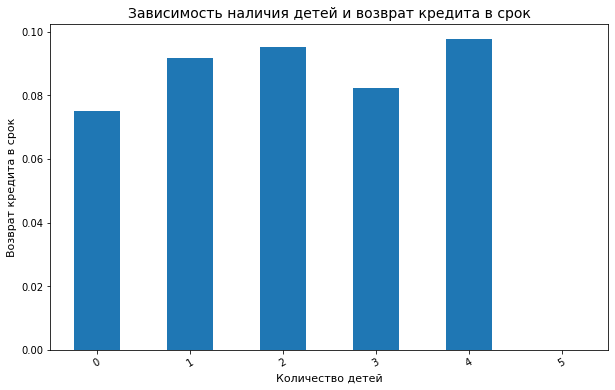

In [87]:
plt.figure(figsize=(10,6));
score_credit.groupby('children')['debt'].mean().plot(kind='bar');
plt.title('Зависимость наличия детей и возврат кредита в срок', fontsize=14);
plt.xlabel('Количество детей', fontsize = 11); 
plt.ylabel('Возврат кредита в срок', fontsize = 11) ;
plt.xticks(rotation=30);

Можно знаметить, что у людей с 5-ю детьми нет задолжностей. Однако 5 детей имеют лишь 9 человек, поэтому нельзя говорить, что 100% когда у тебя 5 детей, то у тебя нет задолжностей, мало информации для рассмотрения. Меньший процент должников у людей без детей (7%, или 800 человек, на 14 тысяч человек). У людей с детьми от 1 до 4 процент должников на 1-2 процента больше, чем без детей. Самый большой показатель у людей с 4-я детьми (почти 10 процентов). 
При рассмотрении видна зависимость когда у тебя нет детей и есть хотя бы 1 ребенок.

### Есть ли зависимость между семейным положением и возвратом кредита в срок? <a name="m2.2"></a>

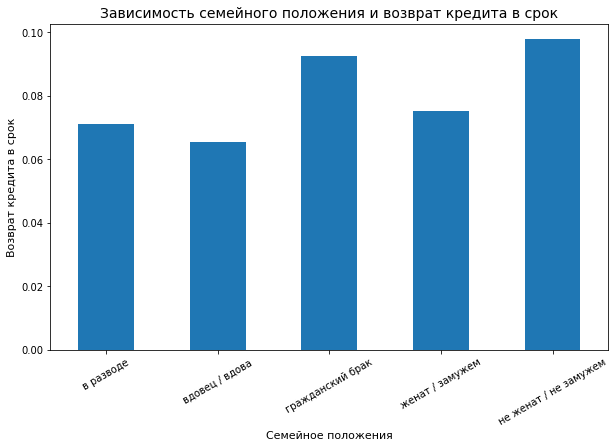

In [82]:
plt.figure(figsize=(10,6));
score_credit.groupby('family_status')['debt'].mean().plot(kind='bar');
plt.title('Зависимость семейного положения и возврат кредита в срок', fontsize=14);
plt.xlabel('Семейное положения', fontsize = 11); 
plt.ylabel('Возврат кредита в срок', fontsize = 11);
plt.xticks(rotation=30);

Почти 10% не женатых людей или людей в гражданском брате имеют задолжности даже с учетом того, что таких людей в 2 раза меньше, чем женатых, у которых процент должников 7%. Зависимость можно увидеть и подумать: нужно ли иметь почти 10% (600 человек) должников на 6000 человек. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок? <a name="m2.3"></a>

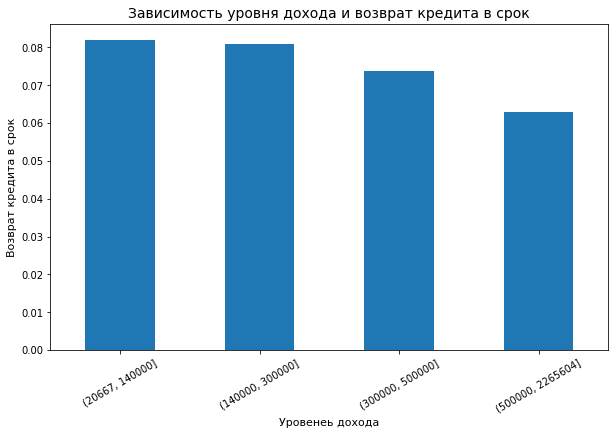

In [84]:
plt.figure(figsize=(10,6));
score_credit.groupby('total_income_group')['debt'].mean().plot(kind='bar');
plt.title('Зависимость уровня дохода и возврат кредита в срок', fontsize=14);
plt.xlabel('Уровенеь дохода', fontsize = 11); 
plt.ylabel('Возврат кредита в срок', fontsize = 11);
plt.xticks(rotation=30);

При визуальной оценки данных видно, что чем больше получает клиент, тем чаще он не имеет задолжностей. Но и чем больше получает клиент, тем меньше он берет кредиты. Зависимость просматривается, но и не стоит забывать, что бОльшая часть клиентов находится в категории "минимальная" и "средняя" заработная плата.

### Как разные цели кредита влияют на его возврат в срок? <a name="m2.4"></a>

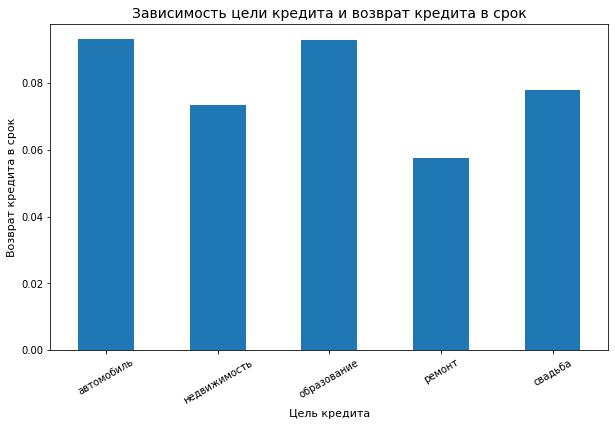

In [89]:
plt.figure(figsize=(10,6));
score_credit.groupby('lemma')['debt'].mean().plot(kind='bar');
plt.title('Зависимость цели кредита и возврат кредита в срок', fontsize=14);
plt.xlabel('Цель кредита', fontsize = 11); 
plt.ylabel('Возврат кредита в срок', fontsize = 11);
plt.xticks(rotation=30);

При визуальном рассмотрении видно, что чаще должники встречаются при оплате кредита на автомобиль и образование. Мне кажется, что здесь уже просматривается какая-то зависимость между целью и возвратом вовремя. Так как разница между должниками по автомобилеям\образованию и по ремонту оценивается в почти 4%. То есть у ремонта на каждые 100 человек 5 должников, а у образования\автомобиля 9 должников, почти в два раза больше. 

## Общий вывод <a name="m2"></a>

При рассмотрении данной таблицы я сделала следующие изменения:
- удалила столбцы с days_employed, family_status_id, education_id, так как эти столбцы никак не влияли на наш анализ, но мешали для восприятия
- нашли пропущенные значения в total_income, которые заменили на медианное значение для каждой категории занятости
- нашли нули в dob_years и удалили их
- нашли артефакты в children в виду -1 и 20 детей, которые тоже удалили
- заменили в total_income тип данных на int
- навели порядок в столбце education, сделав написание образоваия везде нижним регистром
- навели небольшой порядок в family_status, сделав написание везде нижним регистром
- сделали лемматизацию в столбце purpose, разделив цели кредита на 4 категории: образование, автомобиль, недвижимость, свадьба
- категоризировали столбец total_income на 4 категории дохода: минимальный, средний, выше среднего, высокий

При анализе зависимости между детьми\семейным положением\доходом\целью кредита и возвратом кредита вовремя зависимости были выделены такие:
- люди без детей сдают кредит вовремя чаще, чем с детьми, однако категория "5 детей" не берется в рассмотрение, так как не хватает информации (9 человек и 100% возврат не гарантирует, что каждый человек с 5-ю детьми будет все платить вовремя, тут лишь так совпало)
- категории "не женат\ не замужем" и "гражданский брак" чаще имеют должников. на суммарное количество чуть больше 6000 человек должников выходит 600, чаще кредит вовремя сдают вдовцы
- явная зависимость просматривается при визуализации должников по уровню дохода: чем больше получает человек - тем чаще вовремя он платит кредит
- если человек берет кредит на образование или машину, то с чуть большей вероятностью он не будет платить вовремя, однако если человек берет кредит на ремонт, то он платит вовремя чаще остальных

На основе этого можно сделать вывод, что каждая категория имеет свои подводные камни в виду должников. И когда банк будет думать давать клиенту кредит или нет, то нужно рассматривать совокупность каждой зависимости. Пример: если человек с 2-мя детьми в гражданском браке с минимальным доходом берет кредит на автомобиль, то с большей вероятностью он будет должником, так как в каждой категории рассмотрения попадает в высшие показатели должников. 